# MTH 306 PYTHON LAB 3 - DUE April 11th at 11:59 pm EST

This Jupyter notebook will walk you through using Python to do basic Linear Algebra, compute eigenvalues and eigenvectors for constant coefficient systems of linear equations, and plot phase portraits and solution curves to systems. The first part, adapted from our textbook, is done for you as an example. ***You should complete the section below headered with "Now it's your turn!".*** To hand in this Python Lab you should print this document as a pdf, create a pdf of your handwritten solutions, and then merge the two pdfs into one (there are many web sources for doing this). This new pdf should be uploaded to Gradescope by the deadline.

In [87]:
from resources306 import*

---

# Linear Algebra Basics with Python

Defining a matrix in Python can be done in several ways, the easiest of which is to say

In [88]:
A = [[1,2],[3,4]]

Or we could use a Numpy array which will print out our matrix $A$ in a form that we're more used to.

In [89]:
A = np.array([[1,2],[3,4]])
print(A)

[[1 2]
 [3 4]]


We can also use Python to do various matrix operations:

In [90]:
# Addition

B = np.array([[5,6],[7,8]])

A+B

array([[ 6,  8],
       [10, 12]])

In [91]:
#Scalar Multiplication

c = 3

c*A

array([[ 3,  6],
       [ 9, 12]])

In [92]:
# Transpose
A.T

array([[1, 3],
       [2, 4]])

In [93]:
# Matrix Multiplication

np.matmul(A,B)

array([[19, 22],
       [43, 50]])

We can also use Python to find the determinant of the matrix $A$. 

In [94]:
np.linalg.det(A)

Note that if we calculate the determinant of $A$ by hand we get exactly $-2$. Python uses something called an LU factorization algorithm to speed up the computation which can result in a small amount of error.


Finding inverses of square matrices in Python can be done with the following command:

In [95]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

---

# Eigenvalues and Eigenvectors in Python

First, let's start with defining a matrix $A$:

In [96]:
A = [[7,7,0],[-7,7,0],[0,0,13]]

Recall that the eigenvalues $\lambda$ of a matrix $A$ are the values which satisfy the equation
$$det(A - \lambda I) = 0$$
where by det we mean the determinant and by $I$ we mean the identity matrix.

We can compute the eigenvalues $\lambda$ for our matrix $A$ that we have defined above by using the linalg library in numpy (**Note: Numpy in Python uses the letter j to represent the imaginary number which is equal to $\sqrt{-1}$**):

In [97]:
np.linalg.eig(A)

(array([ 7.+7.j,  7.-7.j, 13.+0.j]),
 array([[0.        -0.70710678j, 0.        +0.70710678j,
         0.        +0.j        ],
        [0.70710678+0.j        , 0.70710678-0.j        ,
         0.        +0.j        ],
        [0.        +0.j        , 0.        -0.j        ,
         1.        +0.j        ]]))

The first array that is returned includes our eigenvalues. It looks like we have two complex eigenvalues $\lambda_{1,2} = 7 \pm 7i$ and one real eigenvalue $\lambda_3 = 13$. 

The second array that Python spits out the corresponding normalized (unit “length”) eigenvectors. We won't care about using normalized eigenvectors so instead of using the second array above we will calculate the corresponding eigenvectors with the following command with Sympy: 

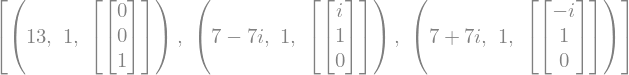

In [98]:
sp.Matrix(A).eigenvects()

The first number in each of the three sets is the eigenvalue, the second number is the multiplicty or number of times that eigenvalue occurs, and the last entry in each set is the corresponding eigenvector.

Consider a different matrix $B$ defined below:

In [99]:
B = [[3,0],[0,3]]

Let's find its eigenvalues and corresponding eigenvectors:

In [100]:
np.linalg.eig(B)

(array([3., 3.]),
 array([[1., 0.],
        [0., 1.]]))

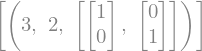

In [101]:
sp.Matrix(B).eigenvects()

Notice that for the matrix $B$ we have an eigenvalue $\lambda = 3$ which is repeated.

----

# Phase Portraits and Sketches of Solutions to Linear Systems

We can even sketch phase portraits and solution curves using Python. 

Consider the following system of equations:

$$\begin{align} x_1' &= -x_1 - x_2 \\ x_2' &= 4x_1 - x_2 \end{align}$$

The corresponding vector equation is 
$$ \vec{x}' = \left[ \begin{array}  & -1 & -1 \\ 4 & -1 \end{array} \right] \vec{x}$$

In [102]:
C = [[-1,-1],[4,-1]]

Let's find the eigenvalues and vectors:

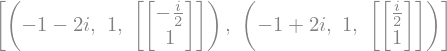

In [103]:
sp.Matrix(C).eigenvects()

So our **real-valued** general solution is 
$$\vec{x} = c_1 \left[\begin{array} &\frac{1}{2}\sin(2t) \\ \cos(2t) \end{array}\right]e^{-t} + c_2 \left[ \begin{array} &-\frac{1}{2}\cos(2t) \\ \sin(2t) \end{array} \right]e^{-t}$$

To graph the phase portrait and solution curves for specific initial conditions we can just use the phaseportraitlinear(..) command from resources306.py. Note that we don't need to specify the general solution, only the constant coefficient matrix $C$ and various initial conditions in the form $(x_0, y_0)$ where $x_0 = x(0)$ and $y_0 = y(0)$.

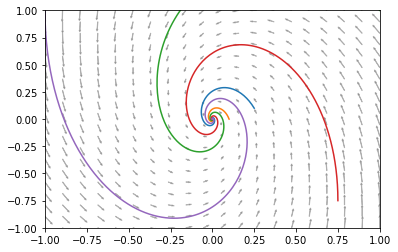

In [104]:
phaseportraitlinear(C,ics=[(0.25,0.1),(0.1,0),(1,1),(0.75,-0.75),(-1,1)])

Note that the solution curves spiral in towards the point $(0,0)$. This point $(0,0)$ is called a **spiral sink** and occurs when the real part of the eigenvalue is negative. 

Recall the following table from pg. 163 in our textbook.

| Eignevalues | Behavior at (0,0) |
| --- | --- |
| real, both positive | source/unstable node |
| real, both negative | sink/stable node|
| real, opposite signs | saddle |
| purely imaginary | center point/ellipse |
| complex, positive real part | spiral source|
| complex, negative real part | spiral sink |



=======================================================================================================================

# Now it's your turn!

### Question 1

Consider the system of linear equations below:

$$ \begin{align*} 3x_1 + 2x_2 &= 3 \\ 2x_1 - x_2 &= -2 \end{align*}$$

This system of equations can be expressed as a vector equation like

$$ \left[\begin{array}  &3 & 2 \\  2 & -1 \end{array}\right] \left[ \begin{array} & x_1 \\  x_2 \end{array}\right] = \left[ \begin{array} & 3 \\  -2 \end{array} \right]$$

Let $A = \left[\begin{array}  &3 & 2 \\  2 & -1 \end{array}\right]$, $\vec{x} = \left[ \begin{array} & x_1 \\  x_2 \end{array}\right] $, and $\vec{b} =  \left[ \begin{array} & 3 \\  -2 \end{array} \right]$. Then this vector equation becomes $A\vec{x} = \vec{b}$. If $A$ is invertible we can solve this system of equations by multiplying by $A^{-1}$ on both sides and we would get the solution $\vec{x} = A^{-1}\vec{b}$. 

a) Use Python to compute the determinant of $A$.

b) Find the inverse of $A$ using Python.

c) Find the solution to the system of equations above using $A^{-1}$ and np.matmul(..).

**Solution**:

In [105]:
A = np.array([[3,2],[2,-1]])
print(A)

[[ 3  2]
 [ 2 -1]]


a) The determinant of $A$:

In [106]:
np.linalg.det(A)

The determinant of $A$ is 7.
$det(A)= 7$

 b) The inverse of $A$:

In [107]:
inv = np.linalg.inv(A)
inv

array([[ 0.14285714,  0.28571429],
       [ 0.28571429, -0.42857143]])

c) The solution to the system of equations:

In [108]:
B= np.array([[3],[-2]])
print(B)

[[ 3]
 [-2]]


In [109]:
np.matmul(inv,B)

array([[-0.14285714],
       [ 1.71428571]])

Soultions are 

$$x_1 = -1/7$$
$$x_2 = 12/7$$

### Question 2

Let $$A = \left[ \begin{array} & 9 & -2 & -6 \\ -8 & 3& 6 \\ 10 &-2 &-6 \end{array} \right]$$

Find the eigenvalues and eigenvectors of $A$. For each eigenvector $\lambda$ and its corresponding eigenvector $\vec{v}$ prove (using Python) that $A\vec{v} = \lambda \vec{v}$. 

**Solution**:

In [110]:
A = [[9, -2, -6],[-8, 3, 6],[10, -2, -6]]

In [111]:
np.linalg.eig(A)

(array([3., 2., 1.]),
 array([[ 0.51449576,  0.48507125, -0.33333333],
        [-0.51449576, -0.48507125,  0.66666667],
        [ 0.68599434,  0.72760688, -0.66666667]]))

Eigenvalues: $\lambda _1 = 1$, $\lambda _2 = 2$, and $\lambda _3 = 3$

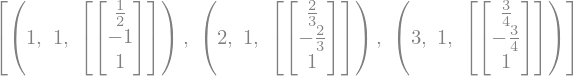

In [112]:
sp.Matrix(A).eigenvects()

Eigenvector are every 3 by 1 matrix above.

Prove (using Python) that $A\vec{v} = \lambda \vec{v}$:

In [113]:
v1 = np.array([[1/2],[-1],[1]])
print(v1)

[[ 0.5]
 [-1. ]
 [ 1. ]]


In [114]:
v2 = np.array([[2/3],[-2/3],[1]])
print(v2)

[[ 0.66666667]
 [-0.66666667]
 [ 1.        ]]


In [115]:
v3 = np.array([[3/4],[-3/4],[1]])
print(v3)

[[ 0.75]
 [-0.75]
 [ 1.  ]]


In [116]:
np.matmul(A,v1)

array([[ 0.5],
       [-1. ],
       [ 1. ]])

In [117]:
1*v1

array([[ 0.5],
       [-1. ],
       [ 1. ]])

$A\vec{v_1} = 1 \vec{v_1}$

In [118]:
np.matmul(A,v2)

array([[ 1.33333333],
       [-1.33333333],
       [ 2.        ]])

In [119]:
2*v2

array([[ 1.33333333],
       [-1.33333333],
       [ 2.        ]])

$A\vec{v_2} = 2 \vec{v_2}$

In [120]:
np.matmul(A,v3)

array([[ 2.25],
       [-2.25],
       [ 3.  ]])

In [121]:
3*v3

array([[ 2.25],
       [-2.25],
       [ 3.  ]])

$A\vec{v_3} = 3 \vec{v_3}$

### Question 3

Consider the following system of equations:

$$\begin{align} x_1' &= x_1  + 3x_3\\ x_2' &= -x_1  + x_3 \\ x_3' &= 2x_1 + 2x_3\end{align}$$


a) Find the general solution to the system of equations. Use Python to compute the eigenvalues and eigenvectors but write the general solution on paper.

b) If we have the initial conditions $x_1(0) = 2, x_2(0) = 1, x_3(0) = 0$, we can solve for the unknown constants $c_1, c_2, c_3$ in the general solution by computing the solution, $\vec{c}$, to the following vector equation
$$X(0)\vec{c} = \vec{x}_0$$
where $\vec{c}$ is the vector whose entries are $c_1,c_2,$ and $c_3$, $X(0)$ is the fundamental solution matrix when $t=0$, and $\vec{x}_0$ is the vector whose entries are $x_1(0), x_2(0)$, and $x_3(0)$. Use Python to find the constants $c_1,c_2$, and $c_3$. Write the particular solution to the system on paper.

**Solution**:

a)

In [122]:
C = [[1,0,3],[-1,0,1],[2,0,2]]

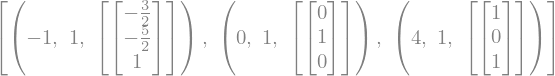

In [123]:
sp.Matrix(C).eigenvects()

**General solution is writen on paper at the end of the lab and also below**

$$\vec{x}(t)= C_1 [[\frac{-3}{2}],[\frac{-5}{2}],[1]]e^{-1t}+C_2[[0],[1],[0]]+C_3[[1],[0],[1]]e^{4t}$$

**Writen much better at the end of the lab on paper**

 b)

In [124]:
D= [[-3/2,0,1],[-5/2,1,0],[1,0,1]]

In [125]:
zeros = [[2],[1],[0]]

In [126]:
inv2=np.linalg.inv(D)
inv2

array([[-4.0000000e-01, -0.0000000e+00,  4.0000000e-01],
       [-1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
       [ 4.0000000e-01, -8.8817842e-18,  6.0000000e-01]])

In [127]:
np.matmul(inv2,zeros)

array([[-0.8],
       [-1. ],
       [ 0.8]])

Hence,
$$C_1 = \frac{-4}{5}$$
$$C_2 = -1$$
$$C_3 = \frac{4}{5}$$

Particular Solution

$$\vec{x}(t)= \frac{-4}{5}[[\frac{-3}{2}],[\frac{-5}{2}],[1]]e^{-1t}+(-1)[[0],[1],[0]]+(\frac{4}{5})[[1],[0],[1]]e^{4t} $$

### Question 4

For each of the following systems of equations do the following:

1) Compute the eigenvalues and eigenvectors.

2) Plot the phase portrait and several ($\geq 4$) solution curves for various initial conditions.

3) Use the table above to describe the behavior of the equilibrium point (0,0). 


**System 1**

$$ \begin{align*} x' &= x + y \\ y' &= x-y \end{align*}$$


**System 2**

$$ \begin{align*} x' &= x + y \\ y' &= 2y \end{align*}$$


**System 3**
$$ \begin{align*} x' &= -2y \\ y' &= 2x \end{align*}$$

**Solution**:

**System 1**

1)

In [128]:
A1= [[1,1],[1,-1]]

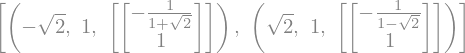

In [129]:
sp.Matrix(A1).eigenvects()

Eigenvalues are $\sqrt{2}$ and $-\sqrt{2}$. Their corrosponging eigenvectors are the 2 by 1 matrix shown above that are in the parentheses with each eigenvalue.

2)

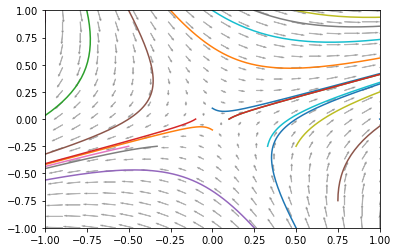

In [130]:
phaseportraitlinear(A1,ics=[(0,0.1), (0,-0.1),(0.1,0),(-0.1,0),(0.25,-1),(-0.5,1),(-0.5,-0.25),(-0.33,-0.25),(0.5,-0.25),(0.33,-0.25),(0.5,-1),(-0.25, 1),(-0.75,1),(0.1,0),(1,1),(0.75,-0.75),(-1,1), (0.25, 1), (0.5, 1), (0,1),(1,0)])

3) saddle

The eignevalues are real, opposite signs so the behavior at $(0,0)$ is saddle.

**System 2**

1)

In [131]:
A2= [[1,1],[0,2]]

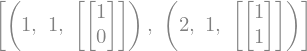

In [132]:
sp.Matrix(A2).eigenvects()

Eigenvalues are $1$ and $2$. Their corrosponging eigenvectors are the 2 by 1 matrix shown above that are in the parentheses with each eigenvalue.

2)

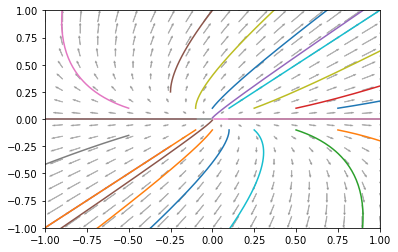

In [133]:
phaseportraitlinear(A2,ics=[(0,0.1), (0,-0.1),(0.1,0),(-0.1,0), (0,0.01), (0,-0.01),(0.01,0),(-0.01,0), (0.25, 0.1), (0.25, -0.1), (0.75, 0.1), (0.75, -0.1), (0.5,-0.1), (0.5,0.1),(-0.25,-0.25),(-0.25,0.25), (-0.5,0.1), (-0.5,-0.15), (-0.1,0.1), (0.1,0.1), (0.1,-0.1),(-0.1,-0.1)])

3) source/unstable node

The eignevalues are real, both positive so the behavior at $(0,0)$ is source/unstable node.

**System 3**

1)

In [134]:
A3= [[0,-2],[2,0]]

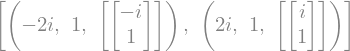

In [135]:
sp.Matrix(A3).eigenvects()

Eigenvalues are $-2i$ and $2i$. Their corrosponging eigenvectors are the 2 by 1 matrix shown above that are in the parentheses with each eigenvalue.

2)

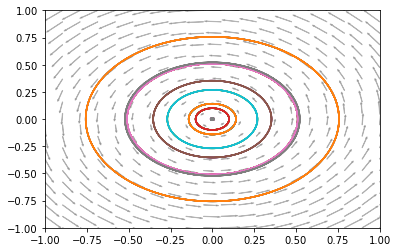

In [136]:
phaseportraitlinear(A3,ics=[(0,0.1), (0,-0.1),(0.1,0),(-0.1,0), (0,0.01), (0,-0.01),(0.01,0),(-0.01,0), (0.25, 0.1), (0.25, -0.1), (0.75, 0.1), (0.75, -0.1), (0.5,-0.1), (0.5,0.1),(-0.25,-0.25),(-0.25,0.25), (-0.5,0.1), (-0.5,-0.15), (-0.1,0.1), (0.1,0.1), (0.1,-0.1),(-0.1,-0.1)])

3) center point/ellipse

The eignevalues are purely imaginary so the behavior at $(0,0)$ is center point/ellipse.

# Textbook Problems

#### Complete the following problems from the textbook and submit them with this Python Lab. 

Problems: 

3.2.7

3.2.51

3.3.1

3.3.6

3.4.151 parts a, c, f, and j (by hand, no Python!)

3.5.101